<a href="https://colab.research.google.com/github/HelmyPurnomoHidayat22/prak-dwdm/blob/main/Tugas11_L200220067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import KMeans


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")


In [3]:
X = pd.read_csv("spotify_data.csv")
X.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
X = X.filter(["danceability", "duration_ms","energy", "instrumentalness	", "key", "liveness", "loudness", "mode", "speechiness", "tempo", "time_signature", "valence", "target", "song_title"], axis=1)
print(X.columns)

Index(['danceability', 'duration_ms', 'energy', 'key', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title'],
      dtype='object')


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['song_title'] = label_encoder.fit_transform(X['song_title'])

X = pd.get_dummies(X, columns=['song_title'])

X.fillna(X.mean(), inplace=True)

X.dropna(inplace=True)

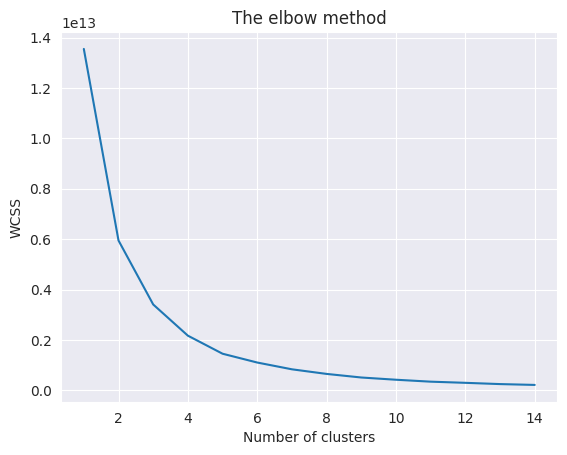

In [6]:
wcss = []

for i in range(1, 15):

    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Melakukan plot untuk hasil sehingga bisa melakukan observasi terhadap elbow
plt.plot(range(1, 15), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

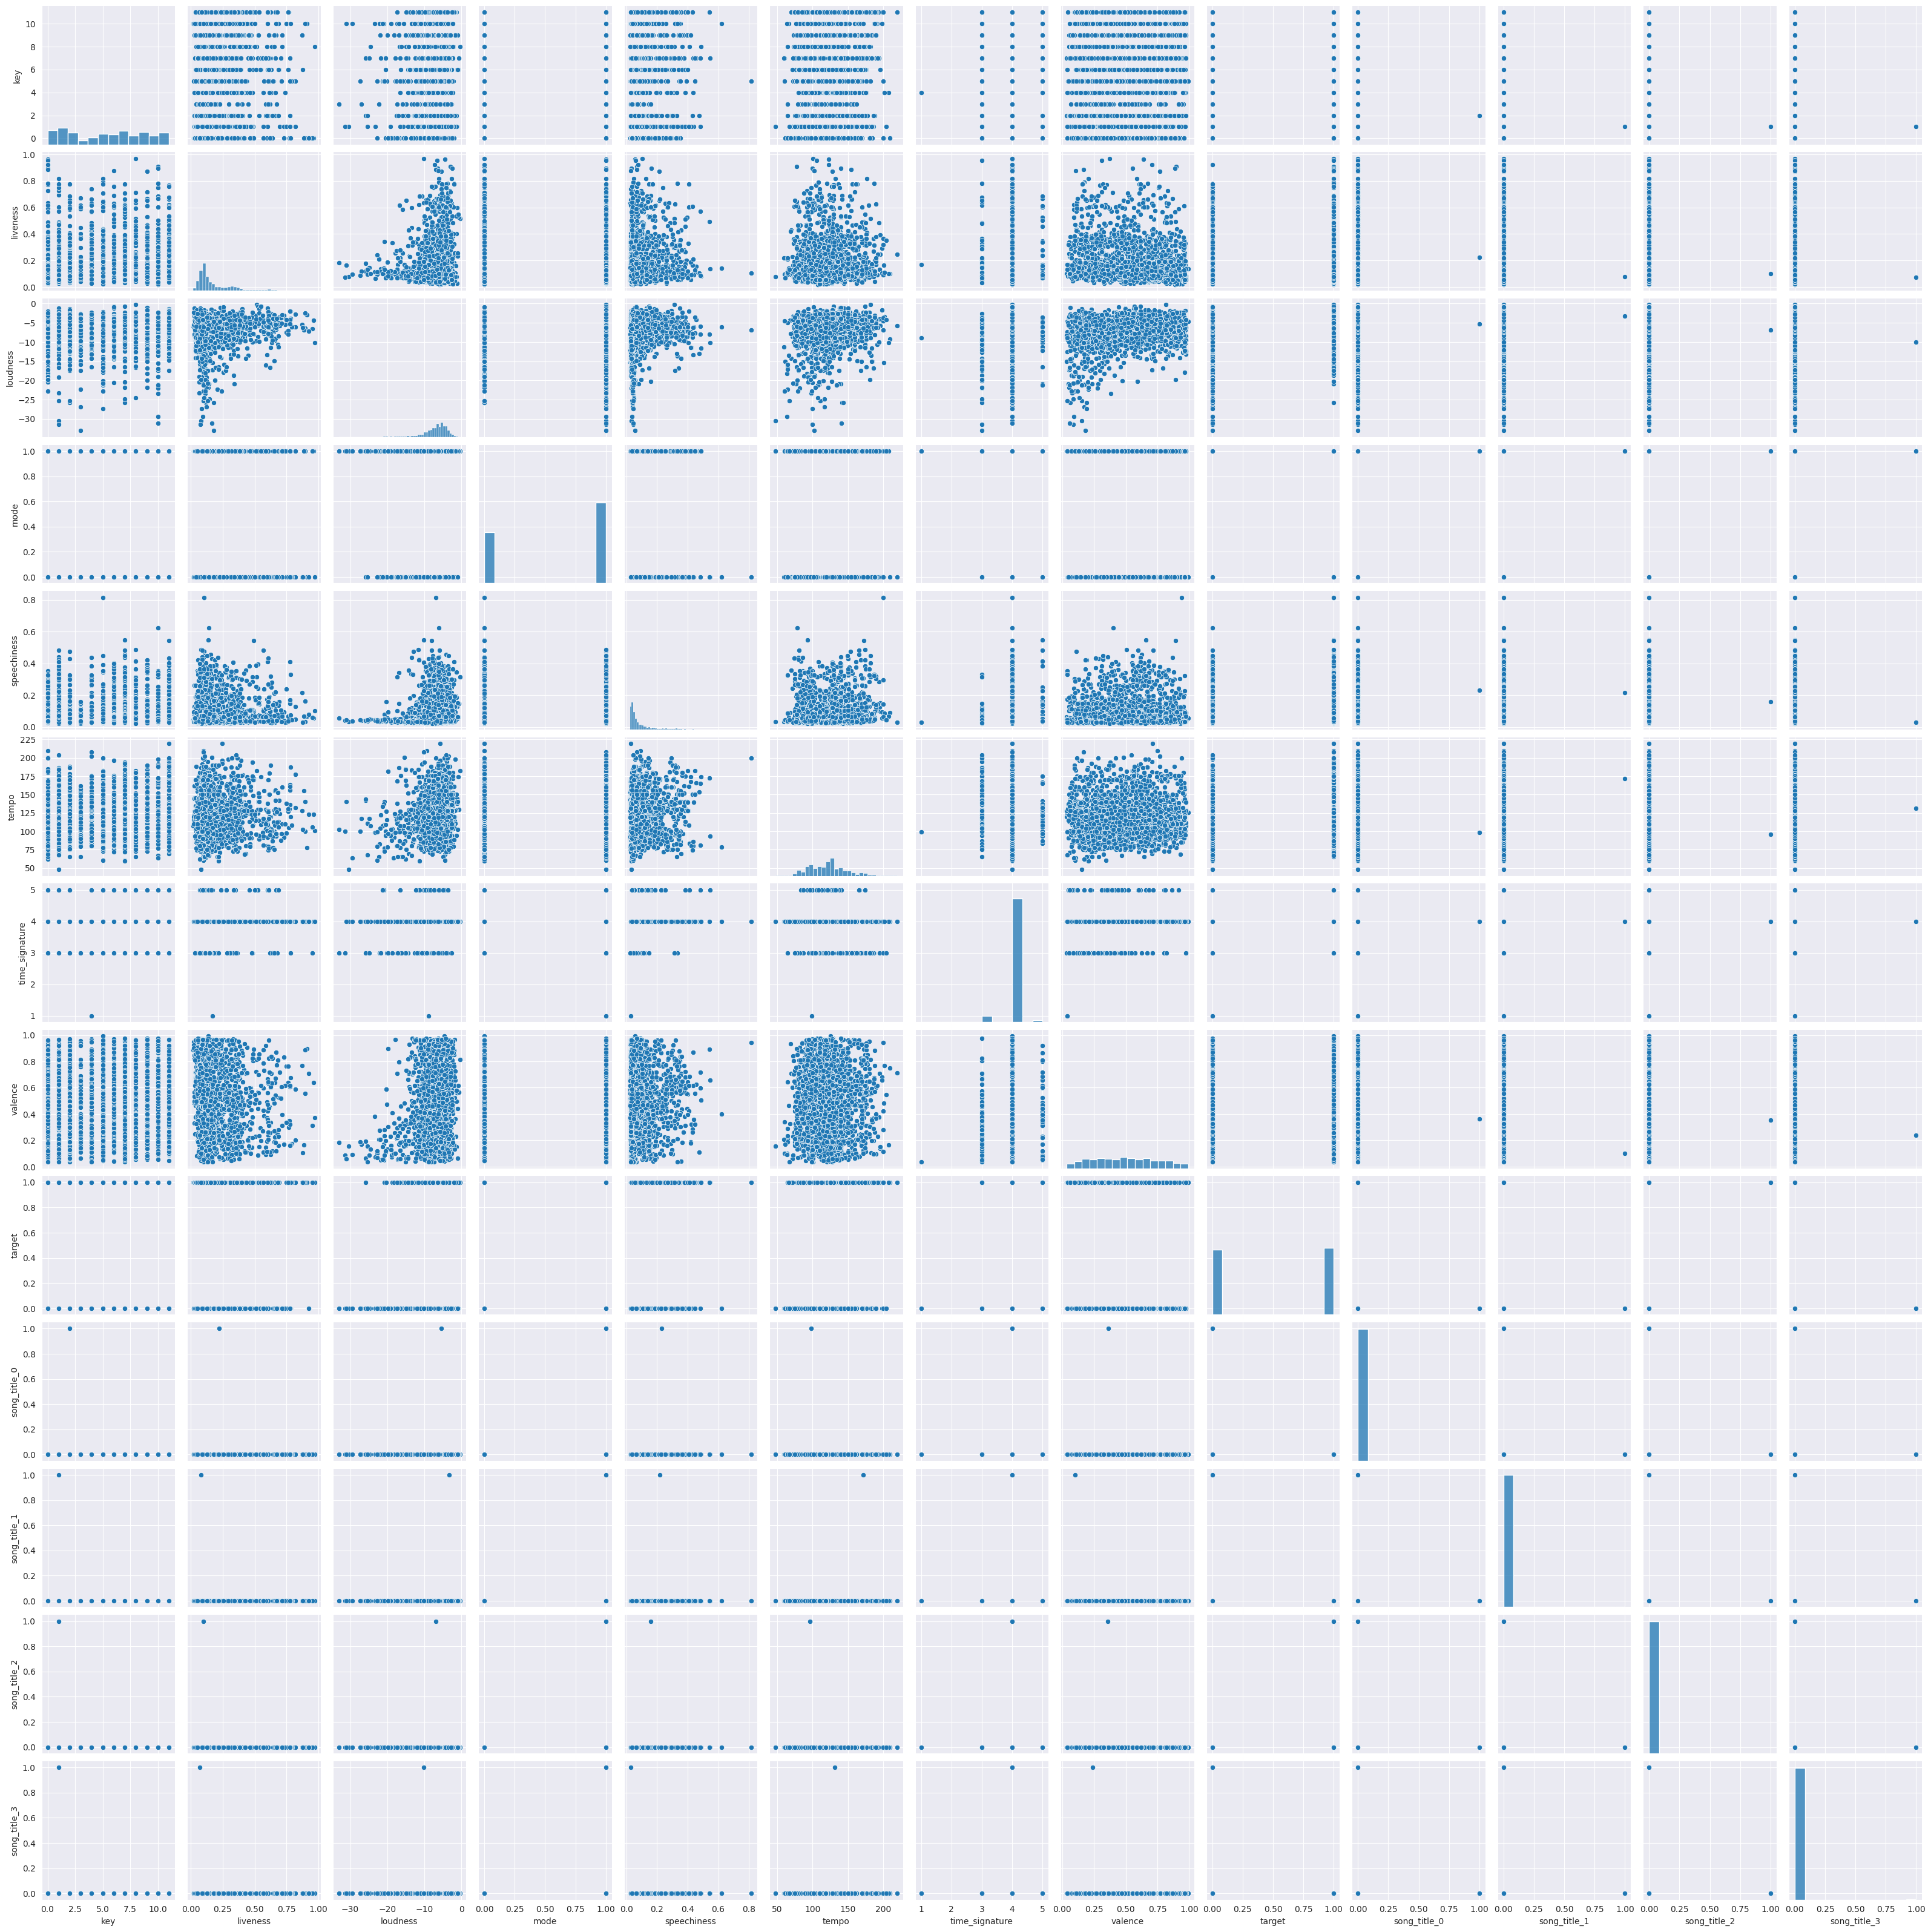

In [7]:
#Visualisasikan data untuk mendapatkan gambaran tentang distribusi data
sns.pairplot(X.iloc[:, 3:16])
plt.show()

In [8]:
model = KMeans(n_clusters = 16)
model.fit(X)

KMeans(n_clusters=16)

In [9]:
print(model.cluster_centers_)

[[ 6.12628049e-01  2.92855750e+05  6.58703049e-01 ... -1.08420217e-18
  -1.08420217e-18 -1.08420217e-18]
 [ 6.27163934e-01  1.82934061e+05  7.01144262e-01 ...  4.09836066e-03
  -1.40946282e-18 -1.40946282e-18]
 [ 6.67891892e-01  4.37736081e+05  6.04510811e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 5.99245283e-01  1.55241547e+05  6.86514151e-01 ... -4.33680869e-19
  -4.33680869e-19 -4.33680869e-19]
 [ 6.16519231e-01  2.65190418e+05  6.93331731e-01 ... -1.30104261e-18
  -1.30104261e-18 -1.30104261e-18]
 [ 6.22398230e-01  2.23437029e+05  6.88756342e-01 ... -1.51788304e-18
   2.94985251e-03 -1.51788304e-18]]


<ipython-input-10-80632012fcda>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered['cluster'] = kmeans.fit_predict(X_filtered)


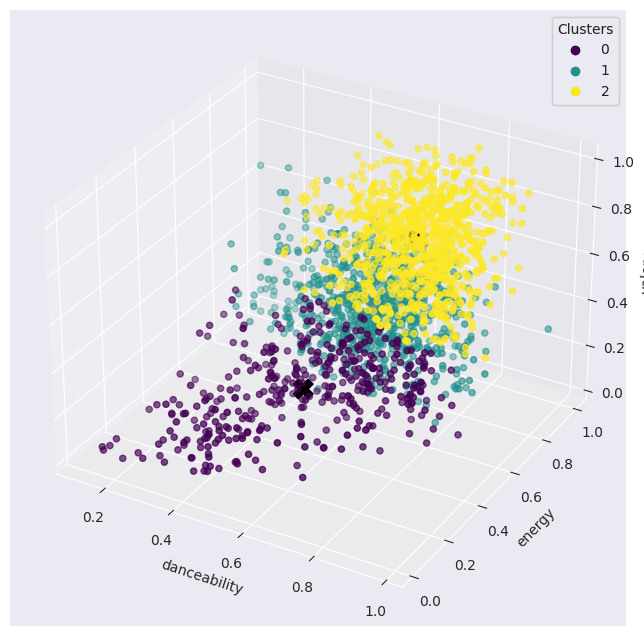

In [10]:

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


# Asumsikan X adalah DataFrame dengan fitur-fitur yang sudah difilter
# Pilih tiga fitur untuk visualisasi
features = ["danceability", "energy", "valence"]

# Menyiapkan data untuk clustering
X_filtered = X[features]

# Terapkan KMeans (misalnya 3 cluster)
kmeans = KMeans(n_clusters=3)
X_filtered['cluster'] = kmeans.fit_predict(X_filtered)

# Membuat plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data dengan warna sesuai cluster
scatter = ax.scatter(X_filtered[features[0]], X_filtered[features[1]], X_filtered[features[2]], c=X_filtered['cluster'], cmap='viridis')

# Tambahkan pusat cluster ke plot
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           kmeans.cluster_centers_[:, 2],
           color='black', s=200, marker='X', label='Centroids')
# Menambahkan label
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])

# Menambahkan legenda
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Menampilkan plot
plt.show()


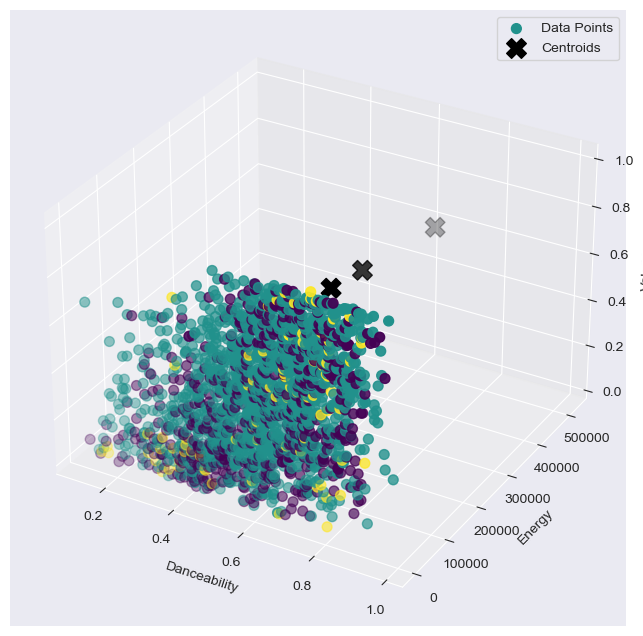

In [ ]:
# Melakukan clustering dengan K-Means (3 cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
X['cluster'] = kmeans.fit_predict(X)

# Membuat plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
#'duration_ms', 'energy', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'target', 'song_title'

# Plot data dengan warna berdasarkan hasil clustering
scatter = ax.scatter(X['danceability'], X['energy'], X['valence'],
                     c=X['cluster'], cmap='viridis', s=50, label='Data Points')

# Tambahkan pusat cluster ke plot
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           kmeans.cluster_centers_[:, 2],
           color='black', s=200, marker='X', label='Centroids')

# Menambahkan label pada setiap sumbu
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Valence')

# Menambahkan legenda
ax.legend()

# Menampilkan plot
plt.show()